# Estimación del número $\pi$
## Método Monte Carlo
### Situación
Nos encontramos ante una superficie de *40 cm X 80 cm* en la que se sitúan una sección cuadrada de lado _a_ y una sección circular de radio _a_.

### 1) Parámetros relevantes del experimento:
- Dimensiones de la superficie: _40cm X 80cm_.
- Tamaño de las figuras, determinado por _a_.
- Posición de cada punto sobre la superficie: _coordenadas x e y_.

In [1]:
# Dimensiones del tablero
table_width = 80
table_height = 40

# a - radio del círculo y lado del cuadrado
a = table_height / 2

# Determinamos la posicion de las figuras en el tablero

# Circulo centrado en el tercer cuarto de la anchura de la superficie
circle_centre = (3 * (table_width / 4), table_height / 2)

# Cuadrado centrado en el primer cuarto de la anchura de la superficie
square_centre = (table_width / 4, table_height / 2)

### 2) Identificar las distribuciones de probabilidad de cada parámetro
El parámetro que se ve afectado por la aleatoriedad en este experimento es la posición en la que cae el punto sobre la superficie. Es decir, las _coordenadas x e y_.

Si tomamos las coordenadas como números de coma flotante, podemos interpretar que se tratan de **variables continuas**.

Puesto que, tanto para _x_ como para _y_ todos los valores dentro del rango posible son equiprobables, nos hallamos ante un caso de **distribución uniforme**.
- El rango que abarca la variable _x_ es un valor continuo en el intervalo de _0cm a 80cm_.
- El rango que abarca la variable _y_ es un valor continuo en el intervalo de _0cm a 40cm_.


### 3) Obtener muestras aleatorias de las distribuciones.
Debemos obtener puntos con coordenadas _(x, y)_ aleatorias. En este caso, obtendremos 1.000.000 de puntos.

In [2]:
import numpy as np

In [3]:
# Definimos el generador de números pseudoaleatorios
rng = np.random.default_rng(23)

In [85]:
# Definimos la función que obtiene tantas coordenadas aleatorias como números de muestras indiquemos
def obtener_coordenadas(rng_seed, numero_muestras):
    coordenada = np.array([(rng_seed.uniform(0, table_width), rng_seed.uniform(0, table_height)) for n in range(numero_muestras)])
    return coordenada

In [131]:
coordenadas = obtener_coordenadas(rng, 1)

print(coordenadas[0])
print(f"El valor de x obtenido es {coordenadas[0,0]}")
print(f"El valor de y obtenido es {coordenadas[0,1]}")

[ 2.78574196 13.97222313]
El valor de x obtenido es 2.785741958110979
El valor de y obtenido es 13.972223130085872


### 4) Realizar la simulación para cada una de las muestras.
Es decir, comprobaremos si cada una de las coordenadas está contenida en el cuadrado, en el círculo, o en ninguna de las dos figuras

In [132]:
# Definimos las coordenadas que se consideran dentro del cuadrado
def dentro_cuadrado(x, y, longitud_lado):

    x_cuadrado, y_cuadrado = square_centre
    x_limite_inferior_cuadrado = x_cuadrado - (longitud_lado / 2)
    x_limite_superior_cuadrado = x_cuadrado + (longitud_lado / 2)
    y_limite_inferior_cuadrado = y_cuadrado - (longitud_lado / 2)
    y_limite_superior_cuadrado = y_cuadrado + (longitud_lado / 2)

    return (x_limite_inferior_cuadrado < x < x_limite_superior_cuadrado) and (y_limite_inferior_cuadrado < y < y_limite_superior_cuadrado)

In [133]:
# Definimos las coordenadas que se consideran dentro del círculo
def dentro_circulo(x, y, radio):
    
    x_circulo, y_circulo = circle_centre
    distancia_a_coordenada = (x - x_circulo)**2 + (y - y_circulo)**2

    return (distancia_a_coordenada < radio**2)

In [137]:
# Comprobamos, en base a las coordenadas dadas, si el punto ha caído dentro de alguna de las figuras
def realizar_simulacion(coordenadas, magnitud_figuras):
    
    # Desglosamos las coordenadas
    x = coordenadas[0]
    y = coordenadas[1]

    # Inicializamos los contadores que indican si el punto ha caído dentro de la figura
    p_circulo = 0
    p_cuadrado = 0
    
    # Si la coordenada se encuentra dentro de la figura, guardamos un 1
    if (dentro_circulo(x, y, magnitud_figuras)):
        p_circulo += 1
    if (dentro_cuadrado(x, y, magnitud_figuras)):
        p_cuadrado += 1

    return [p_circulo, p_cuadrado]


In [138]:
puntos_resultado = realizar_simulacion (coordenadas[0], a)
puntos_circulo = puntos_resultado[0]
puntos_cuadrado = puntos_resultado[1]

print(puntos_resultado)

[1, 0]


Tras haber realizado la simulación, podemos comprobar cuántos puntos se han generado dentro del área de las figuras.

In [52]:
print(f"Se ha lanzado 1 bola: {puntos_circulo} bolas han caído dentro del círculo y {puntos_cuadrado} han caído dentro del cuadrado")

Se ha lanzado 1 bola: 1 bolas han caído dentro del círculo y 0 han caído dentro del cuadrado


### Repetir el proceso
De esta forma, tenemos definido el **experimento** a repetir. Ahora, debemos repetirlo un número significativo de veces para obtener resultados que podamos analizar.

In [140]:
# Establecemos el número de repeticiones que vamos a realizar
N_repeticiones = int(1e5)

In [165]:
# Juntamos la obtención de muestras y la simulación en un procedimiento: el experimento
def experimento(magnitud_figuras, coordenadas):
    resultado = np.array([realizar_simulacion (n, magnitud_figuras) for n in coordenadas])
    return resultado

In [167]:
# Realizamos el experimento para todas las muestras y obtenemos los resultados
def obtener_resultados(magnitud_figuras, coordenadas):
    resultados = experimento(magnitud_figuras, coordenadas)

    puntos_circulo = resultados[:,0].sum()
    puntos_cuadrado = resultados[:,1].sum()

    return [puntos_circulo, puntos_cuadrado]

In [171]:
# Generamos las coordenadas
N_muestras = int(1e4)
coordenadas = obtener_coordenadas(rng, N_muestras)

# Realizamos el experimento y obtenemos los resultados
puntos_resultado = obtener_resultados(a, coordenadas)
puntos_circulo = puntos_resultado[0]
puntos_cuadrado = puntos_resultado[1]

print(f"Del total de {N_muestras} bolas lanzadas, {puntos_circulo} bolas han caído dentro del círculo y {puntos_cuadrado} han caído dentro del cuadrado")

Del total de 10000 bolas lanzadas, 3925 bolas han caído dentro del círculo y 1204 han caído dentro del cuadrado


# 1. Analizar la distribución resultante
### 5) Analizar los resultados
Hemos repetido el experimento 100.000 veces. Ahora sólo nos queda comprobar la proporción de puntos que han caído en el círculo respecto a los que han caído en el cuadrado.

Sabiendo que las fórmulas que definen el área de cada una de las figuras son las siguientes:
- Área del círculo = $\pi * a^2$
- Área del cuadrado = $a^2$

Con estos resultados podemos obtener una aproximación de $\pi$, calculando la proporción de bolas que han caído en el círculo entre las bolas que han caído en el cuadrado:

### $ {A_c \over Ac} = {\pi * a^2 \over a^2} = \pi $


In [173]:
# Generamos las coordenadas
N_muestras = int(1e6)
coordenadas = obtener_coordenadas(rng, N_muestras)

# Cálculo de pi
def aproximar_pi (magnitud_figuras, coordenadas):
    puntos_resultado = obtener_resultados(magnitud_figuras, coordenadas)
    if puntos_resultado[1] == 0:
        return 0
    else:
        return puntos_resultado[0]/puntos_resultado[1]

aproximacion_pi = aproximar_pi (a, coordenadas)
print(f"La aproximación de Pi es {aproximacion_pi}")

La aproximación de Pi es 3.141879507271665


In [157]:
import matplotlib.pyplot as plt

Cuanto mayor sea el número de muestras con el que contemos, más probable es que una de ellas caiga en una de las dos figuras, proporcionandonos información relevante para el experimento.

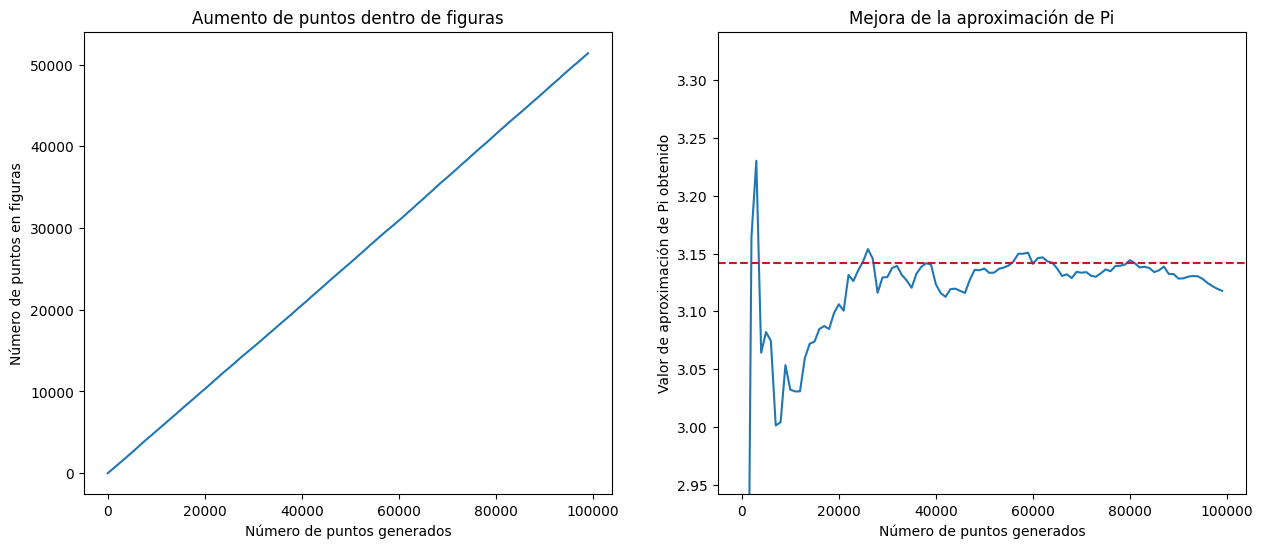

In [180]:
# Generamos las coordenadas solo una vez y analizamos los resultados con diferente número de muestras
N_muestras = int(1e5)
coordenadas = obtener_coordenadas(rng, N_muestras)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# En el eje X (de ambas figuras), el número de puntos generados
x = np.arange(1, N_muestras+1, 1000)

# En el eje Y de la primera figura, la suma total de puntos dentro de figuras para cada X
y1 = np.array([np.array(obtener_resultados(a, coordenadas[:n])).sum() for n in x])

ax1.plot(x, y1)
ax1.set_xlabel("Número de puntos generados")
ax1.set_ylabel("Número de puntos en figuras")
ax1.set_title("Aumento de puntos dentro de figuras")

# En el eje Y de la segunda figura, la aproximación de Pi obtenida para cada X
y2 = np.array([aproximar_pi(a, coordenadas[:n]) for n in x])

ax2.plot(x, y2)
ax2.set_xlabel("Número de puntos generados")
ax2.set_ylabel("Valor de aproximación de Pi obtenido")
ax2.set_ylim(np.pi - 0.2, np.pi + 0.2)
ax2.axhline(y = np.pi, c="firebrick", linestyle="--")
ax2.set_title("Mejora de la aproximación de Pi")

plt.show()


# 2) Estudiar el efecto del parámetro fijo _a_

Es intuitivo que, a mayor tamaño de las figuras, mayor probabilidad de que más puntos caigan en una de las dos figuras y por tanto nuestra estimación de $\pi$ sea mejor.
Para poder demostrarlo matemáticamente, podemos apoyarnos en la estadística.

Los primeros experimentos los hemos realizado estableciendo _a_ como la mitad de la altura de la superficie. Esto se debe a que es el mayor valor que podemos establecer de radio del círculo y que se mantenga dentro de la superficie.

In [189]:
# Definimos el generador de números pseudoaleatorios
rng = np.random.default_rng(45)

# a - radio del círculo y lado del cuadrado
a = table_height / 2

# Número de muestras aleatorias a obtener
N_muestras = int(1e6)
coordenadas = obtener_coordenadas(rng, N_muestras)

# Guardamos los datos resultado de cada uno de los experimentos
resultado = np.array(obtener_resultados(a, coordenadas)).sum()

# Imprimimos el resultado obtenido
print(f"Con el valor de a = {a}, la cantidad de puntos que han caído dentro de figuras es {resultado} de un total de {N_muestras} bolas lanzadas.")
print(f"Es decir, han caído un {resultado/N_muestras:.2%} del total de puntos ha caído dentro de las figuras.")

Con el valor de a = 20.0, la cantidad de puntos que han caído dentro de figuras es 516923 de un total de 1000000 bolas lanzadas.
Es decir, han caído un 51.69% del total de puntos ha caído dentro de las figuras.


El porcentaje de los puntos generado dentro de las figuras es representativo del área que abarcan en el tablero del experimento.\
Para corroborarlo, calculemos qué porcentaje del área total del tablero abarcan las figuras cuando _a_=20.

In [223]:
def porcentaje_area_figuras(magnitud_figura):

    area_circulo  = np.pi * magnitud_figura**2
    area_cuadrado = magnitud_figura**2

    area_tablero = table_height * table_width

    return (area_circulo+area_cuadrado)/area_tablero

print(f"El área de las figuras representa un {porcentaje_area_figuras(a):.2%} del área total del tablero")

El área de las figuras representa un 51.77% del área total del tablero


Por tanto, resulta interesante estudiar la **relación** entre estos dos datos: el tamaño de _a_ y el porcentaje de puntos que caen dentro de las figuras.\
Empecemos estudiando la **covarianza**:

In [204]:
# Creamos un array con diferentes tamaños para a, basandonos en el valor maximo que puede tomar
a_array = np.array([a, a/2, a/3, a/4, a/5, a/6, a/7, a/8, a/9, a/10])

# Generamos las muestras aleatorias
N_muestras = int(1e5)
coordenadas = obtener_coordenadas(rng, N_muestras)

# Calculamos el porcentaje de puntos dentro de las figuras para cada a
porcentaje_en_figuras = np.array([(np.array(obtener_resultados(a, coordenadas)).sum()/N_muestras) for a in a_array])

In [216]:
# Creamos una función que calcula la covarianza entre dos variables
def calcular_covarianza (x, y):

    x_mean = x.mean()
    y_mean = y.mean()

    acc = 0

    for i in range(len(x)):
        acc += (x[i] - x_mean) * (y[i] - y_mean)

    return (1 / len(x)) * acc

# Obtenemos la covarianza
covarianza = calcular_covarianza (a_array, porcentaje_en_figuras)

print(f"La covarianza resultado es {covarianza:.2}.")

La covarianza resultado es 0.77.


El valor de covarianza obtenido es _positivo_, lo cual indica una **dependencia directa** entre ambos valores: a grandes valores de *a*, mayor porcentaje de puntos en las figuras.\
Y como vimos antes, a mayor número de puntos en las figuras, mejor la aproximación de $\pi$ que obtenemos.

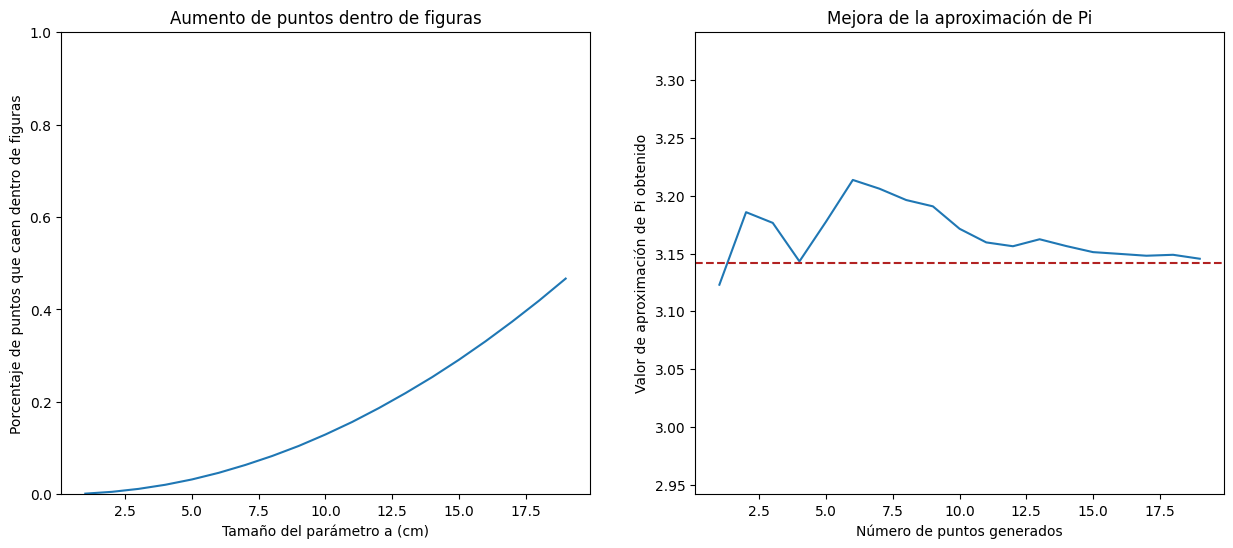

In [226]:
# Tamaño de a
a = table_height / 2

# Generamos las coordenadas solo una vez y analizamos los resultados con diferente número de muestras
N_muestras = int(1e6)
coordenadas = obtener_coordenadas(rng, N_muestras)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# En el eje X, el tamaño de a
x = np.arange(1, a, 1)

# En el eje Y de la primera figura, el porcentaje de puntos que caen dentro de las figuras para cada X
y1 = np.array([(np.array(obtener_resultados(a, coordenadas)).sum()/N_muestras) for a in x])

ax1.plot(x, y1)
ax1.set_xlabel("Tamaño del parámetro a (cm)")
ax1.set_ylim(0.0, 1.0)
ax1.set_ylabel("Porcentaje de puntos que caen dentro de figuras")
ax1.set_title("Aumento de puntos dentro de figuras")

# En el eje Y de la segunda figura, la aproximación de Pi obtenida para cada tamaño de a
y2 = np.array([np.array(aproximar_pi(a, coordenadas)) for a in x])

ax2.plot(x, y2)
ax2.set_xlabel("Número de puntos generados")
ax2.set_ylabel("Valor de aproximación de Pi obtenido")
ax2.set_ylim(np.pi - 0.2, np.pi + 0.2)
ax2.axhline(y = np.pi, c="firebrick", linestyle="--")
ax2.set_title("Mejora de la aproximación de Pi")

plt.show()